# Is easy access to guns leading to more gun deaths?
#### Authored By: Pragyan Sharma, Prerana Patil, Shriya Rao, Sonal Agrawal

---

Over the years, there has been a continuous increase in the number of incidences related to gun violence in the United States. In addition to killing hundreds of Americans, it has forced them to live in a continuous fear of the next shooting. Therefore, in order to understand the magnitude of everyday gun violence, we analyzed data on gun violence statistics and observed that:
<ul>
    <li>Among developed countries, <b><i>US leads other countries in gun ownership</b></i> and has the highest number of gun related homicides.</li>
    <li>Across United States, there has been a continuous <b><i>increase in the number of gun related deaths</b></i>. However,there is a <b><i>significant difference between these numbers for US states with atleast one gun law compared to US states with no gun laws</b></i> restricting access to/usage of guns. The difference in death rate is significantly higher for states with bans related to assault weapons.</li>
     <li>Over the years, <b><i>grisly mass shootings and murder incidences involving use of assault weapons have been on the rise</b></i>. And, in most of the cases, guns were legally obtained.</li>
</ul>

So, what could be the underlying reason that United States is an outlier on gun violence? There have been multiple researches which suggest that it is in large part due to the easy access many Americans have to guns. 

In order to support this claim, we analyzed gun violence in the United States further on three parameters.
<ul>
    <li>Where does United States stand compared to other developed nations on gun violence?</li>
    <li>Is there a relationship between gun related death rate and US state gun laws?</li>
    <li>Is legal right to bear arms in United States responsible for increasing mass shooting incidences?</li>
</ul>
       

## United States vs Other Developed Nations

With less than 5% of the world’s population, the United States is home to roughly 35–50 per cent of the world’s civilian-owned guns, heavily skewing the global geography of guns and any relative comparison. (Ref: https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list)

### Datasets and  Sources
**1. Gun Homicides and Gun Ownership Data from Guardian**: This dataset consists of guns related deaths and ownership details by country. Each row represents a country and details like average guns per 100 people, total guns owned by civilians, etc. (Source: https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list#data)

**2. Developed Countries 2019 Data from World Population Review**: This dataset is a list of developed countries in the world ranked according to their growth rate and population. Source: http://worldpopulationreview.com/countries/developed-countries/

**Variables of interest**
    <ul>
      <li><i>Country</i>: Name of the country </li>
      <li><i>% of homicides by guns</i>: Percentage of homicides due to guns</li>
      <li><i>Homicide by gun rate per 100,000 pop</i>: Number of homicides happened using guns per 100,000  </li>
      <li><i>Address</i>: Address where the mass shooting incidence took place</li>
      <li><i>Average total all civilian gun</i>: Average number of guns held by civilians</li>
      <li><i>Growth Rate</i>: The rate at which a country is growing according to CIA</li>
    </ul>
    
**Limitations**
<ul>
      <li> Data is present only for Small Arms</li>
      <li> While the website says that the google spreadsheet (Sources: UNODC & Small arms survey) displaying this data is updated every 5 mins, we do not know if the statistics for 'Number of homicides' & 'Average guns per 100 people' have been updated for the current years or not </li>
      <li> Gun Homicides and Gun Ownership Data for United Kingdom and South Korea is not present</li>
  </ul>


### Data Cleaning

The dataset needs some processing before we start exploring and visualizing the dataset further. Steps to be followed are:
- Renaming column names for efficient data handling
- Handling Null values
- Merging with the list of developed countries

Step 1: Reading in data for world crimes

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
dataset_url = "https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/datasets/"

In [5]:
world_crime = pd.read_csv(dataset_url + "world_crime.csv")
world_crime.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


Step 2: Renaming columns for efficient data handling

In [6]:
# Creating a new list of column names
cols = ['Country', 'Country_code', 'Source', '%_homi_gun', 'num_homi_gun', 'homi_gun_per100k', 'rank-rate_owner',\
        'avg_gun_per100', 'avg_tot_all_guns']
# Replacing the existing column names with new names saved in the list 'cols'
world_crime.columns = cols

Step 3: Handling Null values

In [7]:
#Checking columns with 'NA' values
world_crime.isna().sum()

Country              0
Country_code         1
Source              69
%_homi_gun          69
num_homi_gun        69
homi_gun_per100k    69
rank-rate_owner      9
avg_gun_per100       9
avg_tot_all_guns     9
dtype: int64

In [8]:
# Removing all the 'NA' values
world_crime = world_crime.dropna()
len(world_crime)

107

Step 4: Merging the crime data will all the countries and combining with a list of developed countries

In [9]:
# Reading in data for growth rates for all 'Developed' countries
developed_countries = pd.read_csv(dataset_url+"developed.csv")
developed_countries.head()

,cca2,name,area,pop2019,GrowthRate
0,US,United States,9372610,329093.110,1.007119
1,JP,Japan,377930,126854.745,0.997401
2,TR,Turkey,783562,82961.805,1.012756
3,DE,Germany,357114,82438.639,1.001764
4,GB,United Kingdom,242900,66959.016,1.005791


In [10]:
# Checking for NAs
developed_countries.isna().sum()

cca2          0
name          0
area          0
pop2019       0
GrowthRate    0
dtype: int64

Merging world crime data with growth rate for developed nations in order to find the position of the United States as compared to other countries. We are using inner join because we want to see the data only for developed countries.

In [11]:
# Merging world crimes and growth rates dataset
world_crime_developed = world_crime.merge(developed_countries, how="inner", left_on="Country", right_on="name")
# Removing columns that are not required for the analysis
world_crime_developed.drop(columns = ['Source', 'cca2','name', 'area'], inplace = True)

### Final Dataset

In [12]:
world_crime_developed.head()

,Country,Country_code,%_homi_gun,num_homi_gun,homi_gun_per100k,rank-rate_owner,avg_gun_per100,avg_tot_all_guns,pop2019,GrowthRate
0,Australia,AU,11.5,30.0,0.14,42.0,15.0,3050000.0,25088.636,1.012772
1,Austria,AT,29.5,18.0,0.22,14.0,30.4,2500000.0,8766.201,1.001643
2,Belgium,BE,39.5,70.0,0.68,34.0,17.2,1800000.0,11562.784,1.005589
3,Canada,CA,32.0,173.0,0.51,13.0,30.8,9950000.0,37279.811,1.008823
4,Cyprus,CY,26.3,5.0,0.46,6.0,36.4,275000.0,1198.427,1.007856


In [13]:
world_crime_developed.to_csv("world_crime.csv")

### Exploration

Countries as per gun ownership rate

In [14]:
world_crime_developed.sort_values(by = 'rank-rate_owner')[:5]

,Country,Country_code,%_homi_gun,num_homi_gun,homi_gun_per100k,rank-rate_owner,avg_gun_per100,avg_tot_all_guns,pop2019,GrowthRate
28,United States,US,60.0,9146.0,2.97,1.0,88.8,270000000.0,329093.110,1.007119
26,Switzerland,CH,72.2,57.0,0.77,3.0,45.7,3400000.0,8608.259,1.007517
8,Finland,FI,19.8,24.0,0.45,4.0,45.3,2400000.0,5561.389,1.003405
4,Cyprus,CY,26.3,5.0,0.46,6.0,36.4,275000.0,1198.427,1.007856
25,Sweden,SE,33.9,37.0,0.41,10.0,31.6,2800000.0,10053.135,1.007055


Countries by average number of all civilian owned guns

In [15]:
world_crime_developed.sort_values(by = 'avg_tot_all_guns', ascending = False)[:5]

,Country,Country_code,%_homi_gun,num_homi_gun,homi_gun_per100k,rank-rate_owner,avg_gun_per100,avg_tot_all_guns,pop2019,GrowthRate
28,United States,US,60.0,9146.0,2.97,1.0,88.8,270000000.0,329093.110,1.007119
10,Germany,DE,26.3,158.0,0.19,15.0,30.3,25000000.0,82438.639,1.001764
9,France,FR,9.6,35.0,0.06,12.0,31.2,19000000.0,65480.710,1.003793
3,Canada,CA,32.0,173.0,0.51,13.0,30.8,9950000.0,37279.811,1.008823
27,Turkey,TR,16.9,535.0,0.77,52.0,12.5,9000000.0,82961.805,1.012756


### Analysis

**Graph 1**: This visualization indicates the number of gun related homicides per 1 million people for all developed nations. Key variables of interest are - Country and homi_gun_per100k in the world crime dataset.

We can clearly see that United States is way ahead of other developed nations in terms of gun related homicides and is clearly an <b><i>outlier on gun violence</b></i>. Number of homicides by guns per 1 million people in US(29.70) account for <b><i>almost 6 times as of Canada(5.10) and 16 times as of Germany(1.90)</b></i>.
  

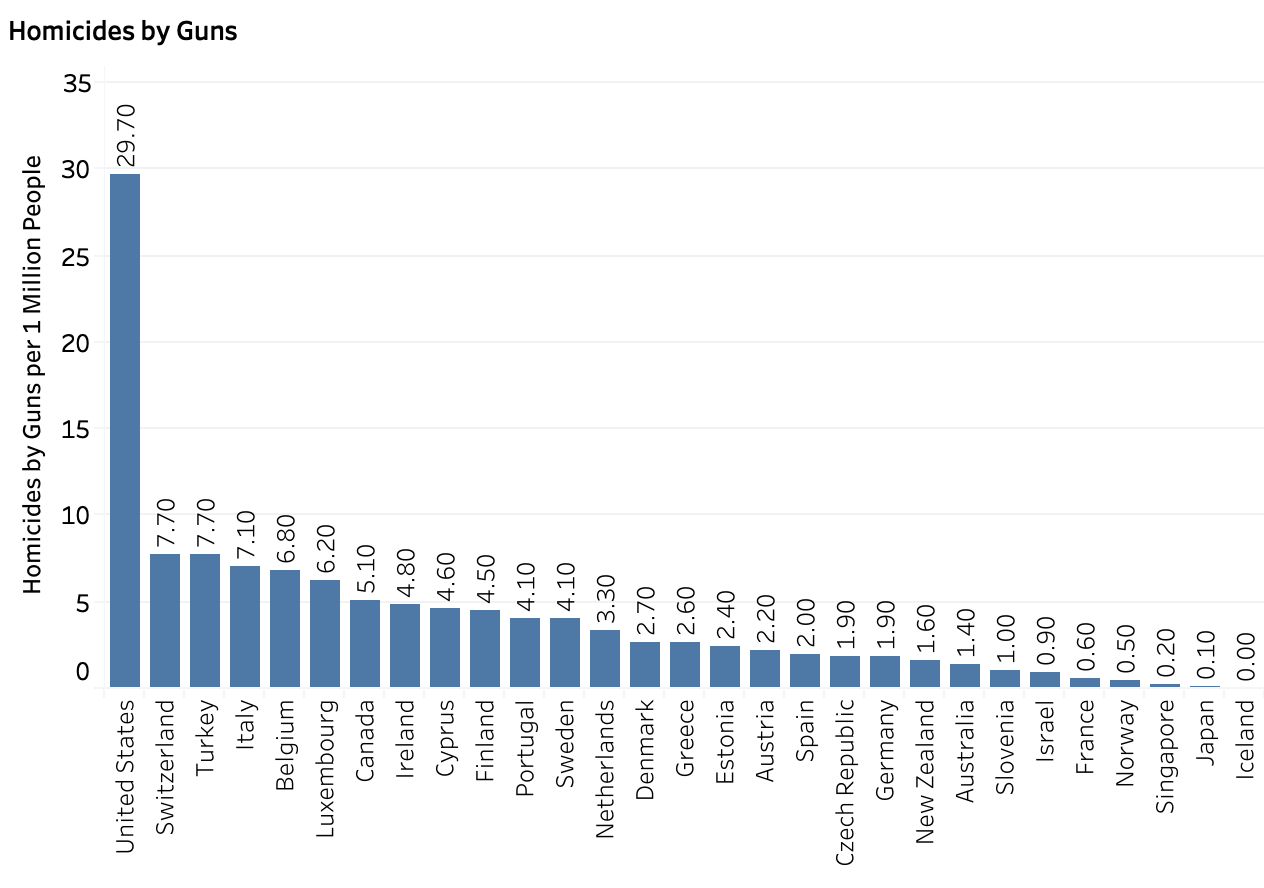

In [16]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/country_gunHomicides.png', width = 1300, height = 700)

**Graph 2**: These two visualizations compare the difference between the gun ownership and population statistics for United States and the other developed nations. Key variables of interest are - Country, pop2019, avg_tot_all_guns.


It indicates that US alone is home to <b><i>more than 70% of the total guns among all the developed nations</b></i>. Also, it indicates that <b><i>US accounts for 33% of the total populations among all developed nations</b></i>.

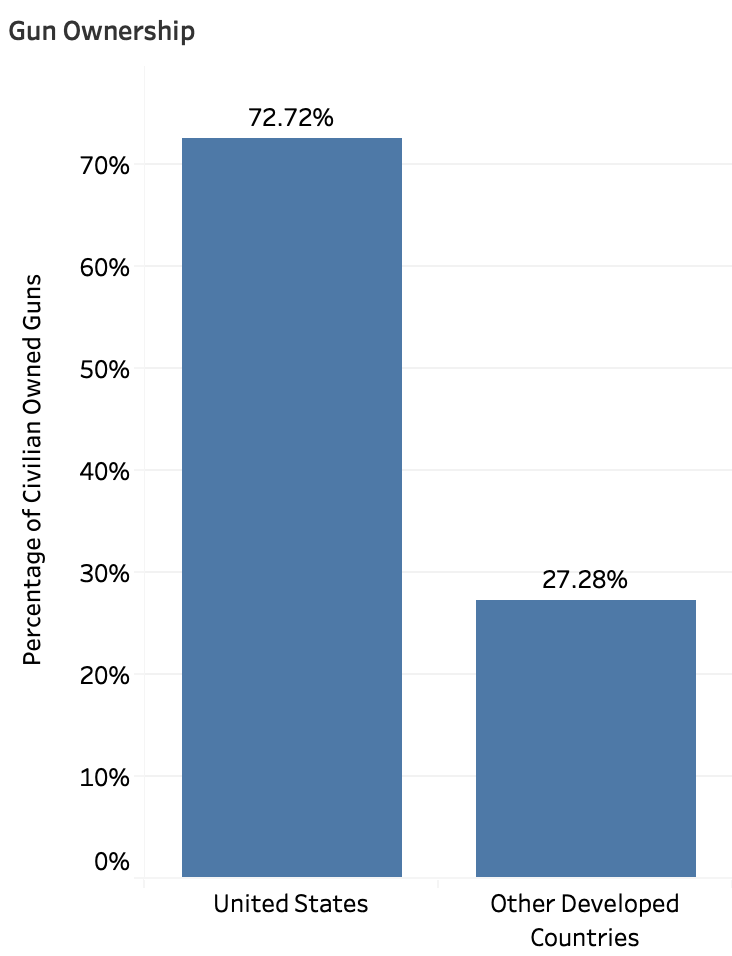

In [32]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/countrywise_USRest_gunownership.png', width = 400, height = 200)

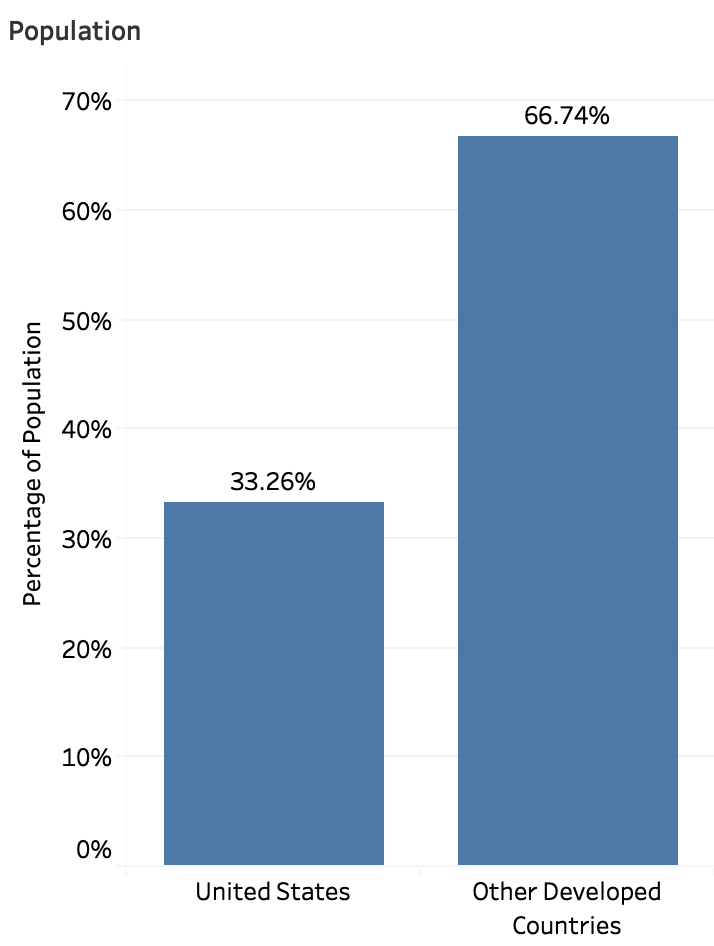

In [33]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/countrywise_USRest_population.png', width = 400, height = 200)

**Graph 3**: This graph showcases relationship between gun ownership and gun related deaths across developed nations. Key variables of interest are - Country, homi_gun_per100k, avg_gun_per100.


It indicates that <b><i>US is an outlier compared to other developed nations and witnesses more gun related deaths due to higher gun ownership</b></i>.

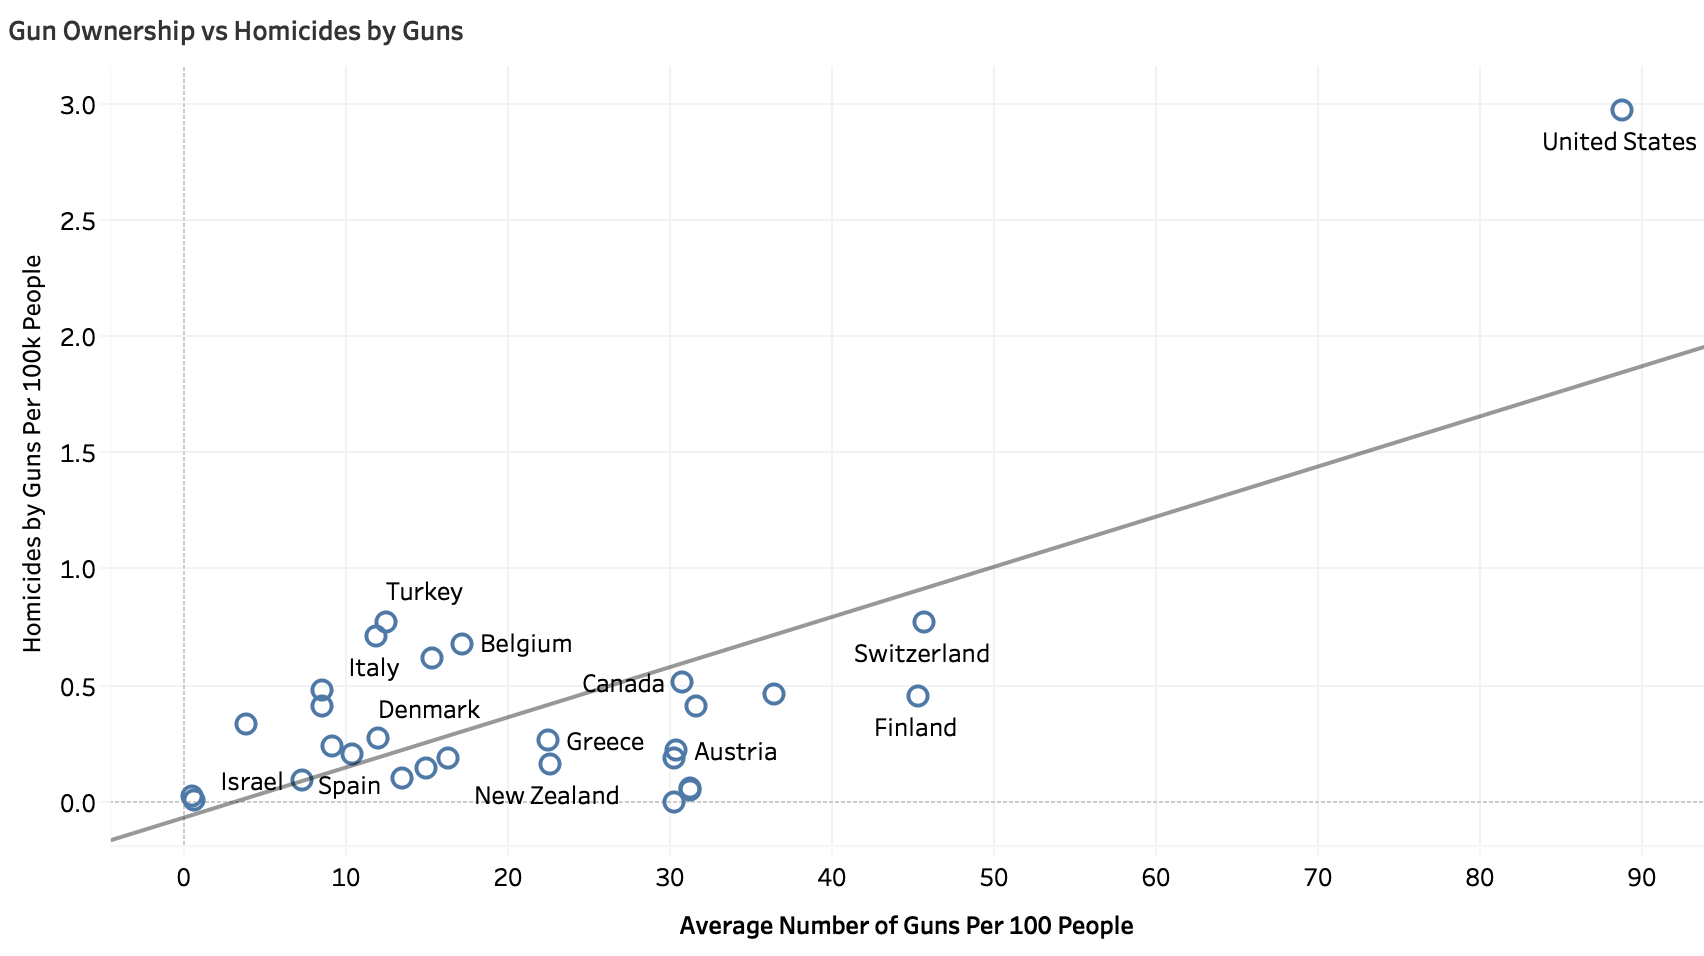

In [23]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/country_gunper100homi.png', width = 900, height = 700)

### The argument that we are trying to present here is that gun availability is a major risk factor for homicides in developed nations. This is supported by the above graphs which indicate that a higher gun ownership in United States is responsible for a higher gun related death rate. 

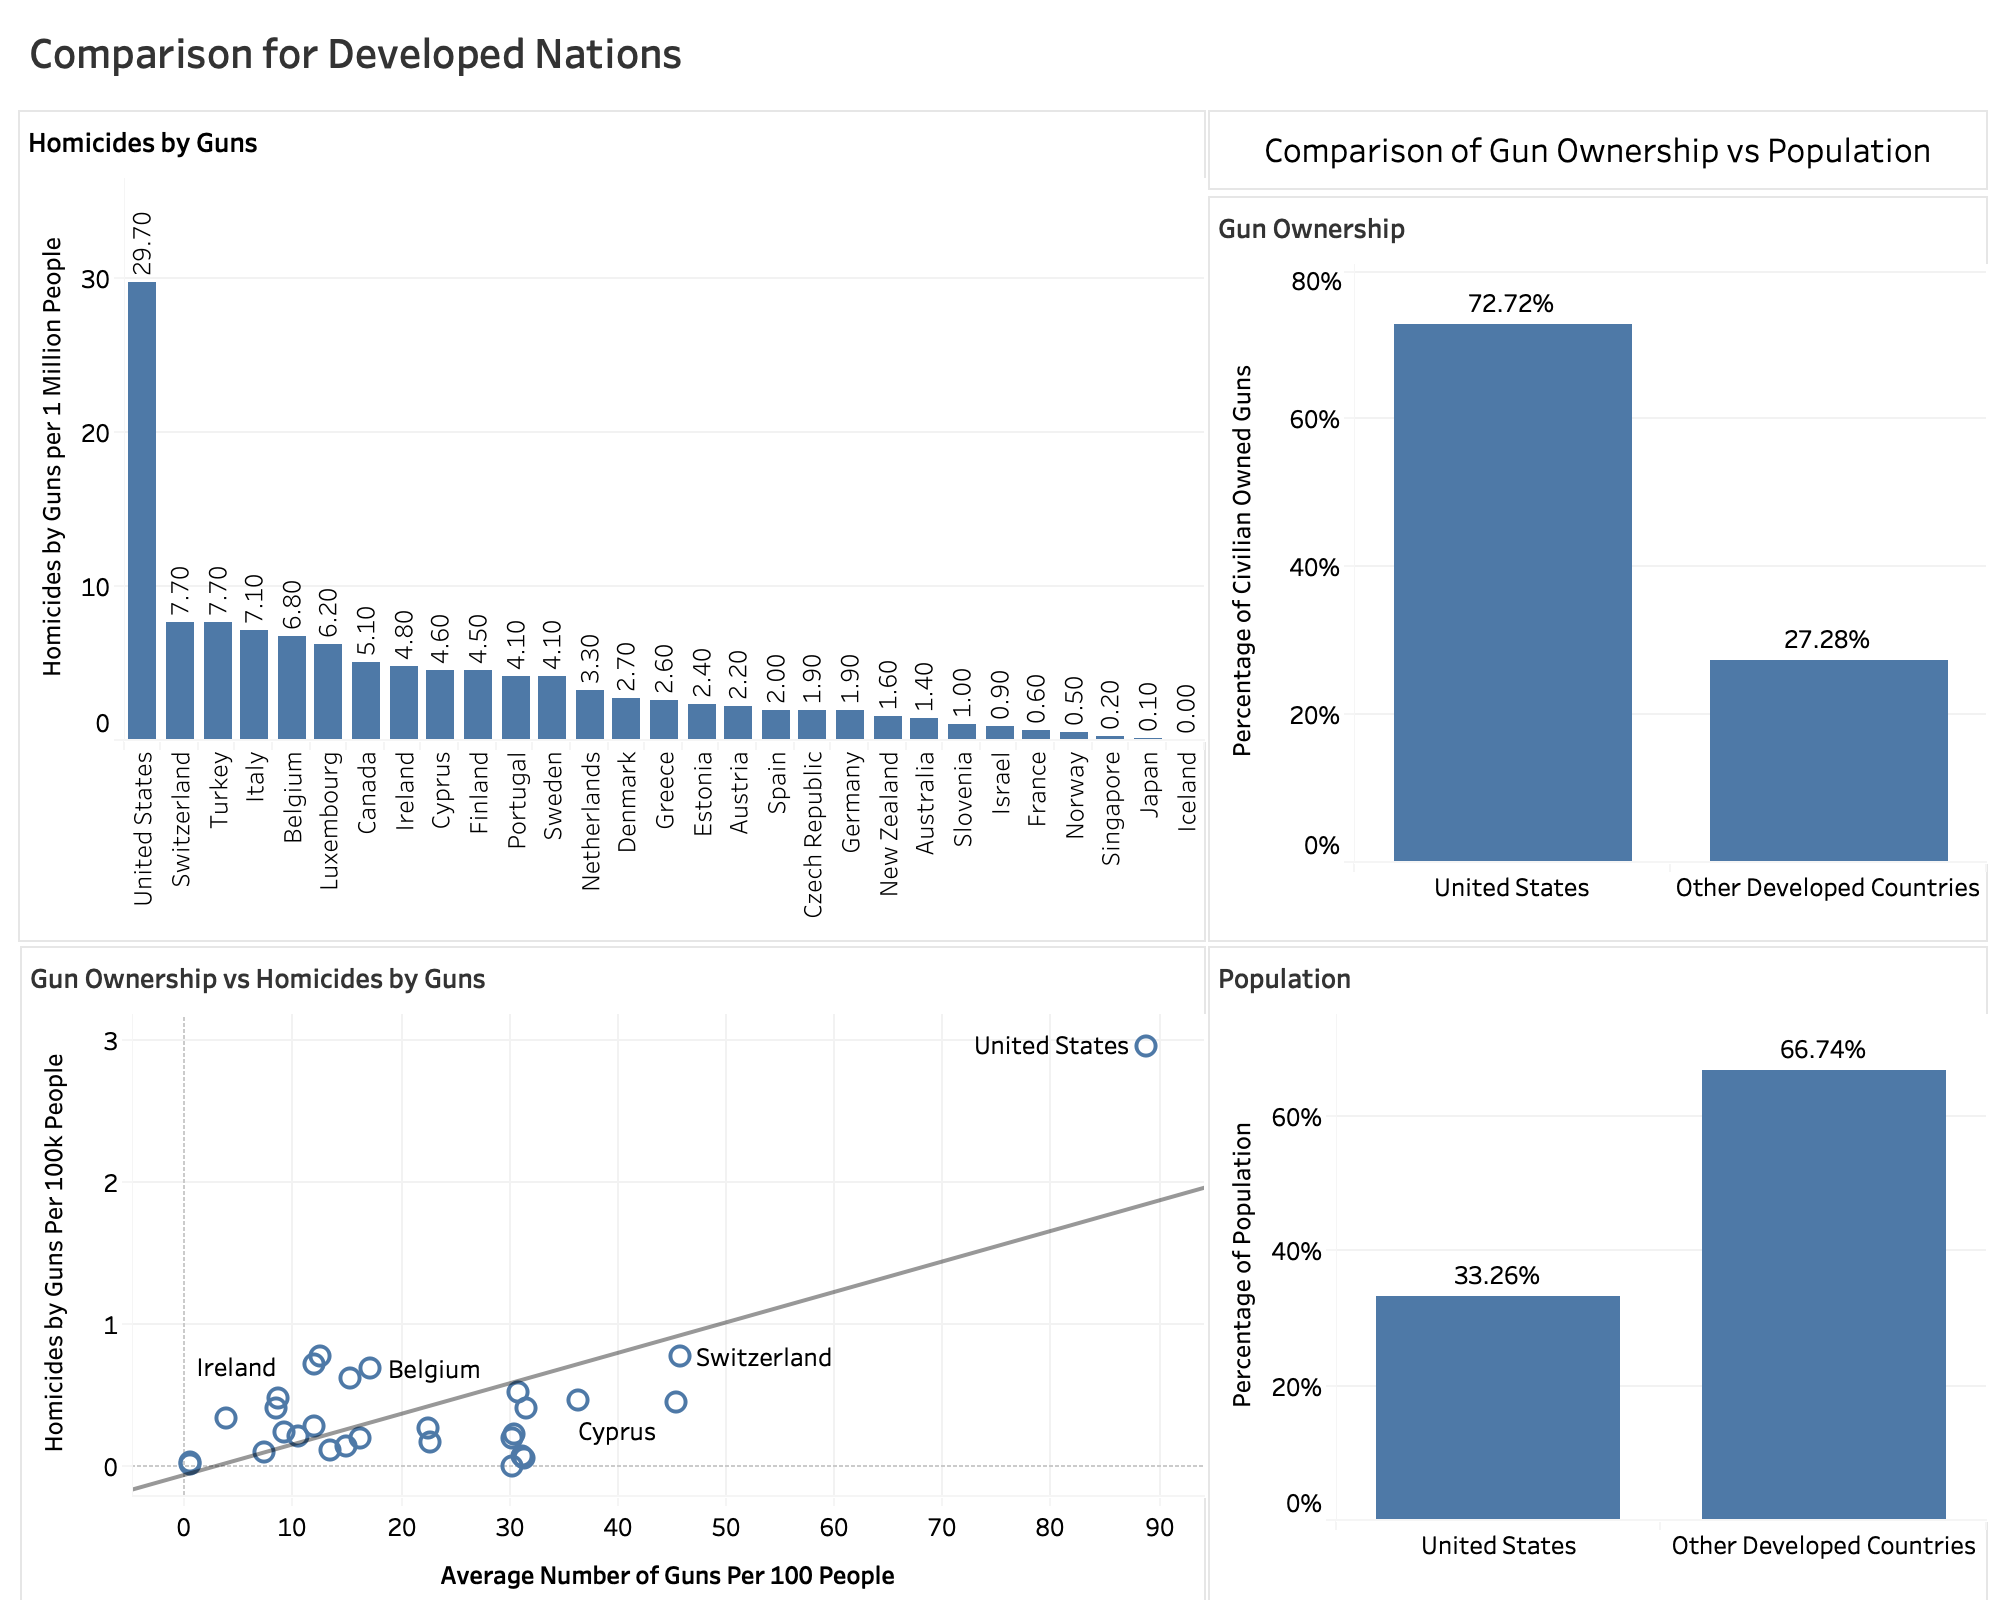

In [24]:
# Dashboard
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/CountryAnalysis.png', width = 1300, height = 700)

---

## Gun Laws vs Gun Deaths in United States

According to an article in New York Times, "*More people died from firearm injuries in the United States in 2017 than in any other year since at least 1968, according to new data from the Centers for Disease Control and Prevention*." (Ref: https://www.nytimes.com/2018/12/18/us/gun-deaths.html).

In fact, 2017 witnessed the highest number of mass shootings alone, killing and injuring hundreds of innocent lives. To understand the seriousness of the situation, we plan to visualize each of the mass shooting incidents on the map of the United States.   

### Datasets and Sources

**1.  Mass Shootings Data from Gun Violence Archive**: The dataset consists of gun violence incidents collected from Jan 01, 2013 to May 18, 2019. Each row of the dataset represents an incident in the United States with details regarding the incident location and number of people killed and injured. Source: https://www.gunviolencearchive.org/

**2. City Locations Data from Opensoft**: The dataset consists of US cities and their geographical locations. Each row represents a city and its geographical coordinates and details like population, timezone, etc. Source: https://public.opendatasoft.com/explore/dataset/1000-largest-us-cities-by-population-with-geographic-coordinates/table/?sort=-rank

**Variables of Interest:**
    <ul>
      <li><i>Incident Date</i>: The date of the mass shooting incident</li>
      <li><i>State</i>: State where the mass shooting incident took place</li>
      <li><i>City</i>: City where the mass shooting incident took place</li>
      <li><i>Address</i>: Address where the mass shooting incident took place</li>
      <li><i>num_Killed</i>: Number of people killed in the mass shooting incident</li>
      <li><i>num_Injured</i>: Number of people injured in the mass shooting incident</li>
      <li><i>Latitude</i>: Latitude of the given city</li>
      <li><i>Longitude</i>: Longitude of the given city</li>
    </ul>
    
**Limitations**
* City Locations Dataset has geolocations only for 1000 largest US cities based on population, so we lose the mass shootings information about some of the smaller cities


### Data Cleaning
The dataset needs some preparation before we start exploring and visualizing the dataset further. Steps to be follwed are:
<ul>
  <li>Renaming columns for efficient data handling</li>
  <li> Creating new features e.g. month and year from date </li>
  <li>Adding latitude and longitude (geolocation) for each of the given locations for maps</li>
  <li>Handling Null values</li>
</ul>

Step1: Reading and merging data for mass shootings from 2013 to 2019

In [48]:
dataset_url = "https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/datasets/"

In [49]:
y2013 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2013.csv")
y2014 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2014.csv")
y2015 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2015.csv")
y2016 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2016.csv")
y2017 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2017.csv")
y2018 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2018.csv")
y2019 = pd.read_csv(dataset_url+"Mass%20Shootings%20year%20wise/Mass_Shootings_2019.csv")
# combining data for all the years 
mass_shoot = pd.concat([y2013, y2014, y2015, y2016, y2017, y2018, y2019])
mass_shoot.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2013",New York,Brooklyn,60 Glenmore Ave,0.0,6.0,NaN
1,"December 28, 2013",Alabama,Montgomery,954 Highland Ave,3.0,5.0,NaN
2,"December 26, 2013",Louisiana,Slidell,2144 First St,2.0,6.0,NaN
3,"December 26, 2013",Louisiana,Lockport,313 Tenth St,3.0,3.0,NaN
4,"December 25, 2013",New Jersey,Irvington,Nye Avenue and 21st Street,3.0,2.0,NaN


Step 2: Renaming columns for efficient data handling

In [50]:
mass_shoot.rename(columns={'Incident Date':'Date','City Or County':'City', '# Killed':'num_Killed', '# Injured':'num_Injured'}, inplace=True)

Step 3: Extracting Month and Year from the incident Date column

In [51]:
from datetime import datetime as dt
mass_shoot['Date'] = pd.to_datetime(mass_shoot['Date'])
mass_shoot['Month'] = mass_shoot['Date'].dt.month
mass_shoot['Year'] = mass_shoot['Date'].dt.year

Step 4: Reading data for Latitudes and Longitudes for cities in the United States

In [52]:
cities_location = pd.read_csv(dataset_url+ "uscitiesv1.5.csv")
# Selecting relevant columns for further analysis
cities_location_sub = cities_location[['city','state_id', 'state_name','lat', 'lng']]
cities_location_sub.head()

,city,state_id,state_name,lat,lng
0,Prairie Ridge,WA,Washington,47.1443,-122.1408
1,Edison,WA,Washington,48.5602,-122.4311
2,Packwood,WA,Washington,46.6085,-121.6702
3,Wautauga Beach,WA,Washington,47.5862,-122.5482
4,Harper,WA,Washington,47.5207,-122.5196


Step 5: Merging mass shootings data with city locations to use with maps. Left join has been used to ensure we have all the data from mass_shoot.


In [53]:
# Merging datasets
mass_shooting_data = mass_shoot.merge(cities_location_sub,how='left', left_on=['City', 'State'], right_on=['city', 'state_name'])
# Dropping extra columns which we won't be using further
mass_shooting_data.drop(columns=['Operations', 'city', 'state_name','state_id'], inplace=True)

Step 6: Removing all the NA values

In [54]:
#Removing NA
mass_shooting_data = mass_shooting_data.dropna()
# Checking number of rows in the combined dataframe
len(mass_shooting_data)

1915

### Final Dataset

In [55]:
mass_shooting_data.head()

,Date,State,City,Address,num_Killed,num_Injured,Month,Year,lat,lng
0,2013-12-31,New York,Brooklyn,60 Glenmore Ave,0.0,6.0,12.0,2013.0,40.6501,-73.9496
1,2013-12-28,Alabama,Montgomery,954 Highland Ave,3.0,5.0,12.0,2013.0,32.3470,-86.2663
2,2013-12-26,Louisiana,Slidell,2144 First St,2.0,6.0,12.0,2013.0,30.2882,-89.7826
3,2013-12-26,Louisiana,Lockport,313 Tenth St,3.0,3.0,12.0,2013.0,29.6418,-90.5376
5,2013-12-25,New York,Medford,33A Cedarhurst Ave,1.0,3.0,12.0,2013.0,40.8220,-72.9859


In [56]:
mass_shooting_data.to_csv("mass_shootings.csv")

### Exploration

Number of lives lost in mass shootings by year

In [57]:
mass_shooting_data.groupby('Year')['num_Killed'].sum()\
.reset_index().sort_values(by= 'num_Killed', ascending = False) 

,Year,num_Killed
3,2016.0,411.0
4,2017.0,392.0
2,2015.0,332.0
5,2018.0,328.0
0,2013.0,249.0
1,2014.0,242.0
6,2019.0,130.0


Cities that lost most number of lives in mass shootings

In [58]:
mass_shooting_data.groupby('City')['num_Killed','num_Injured'].sum()\
.reset_index().sort_values(by= 'num_Killed', ascending = False)[:5]                      

,City,num_Killed,num_Injured
106,Chicago,82.0,573.0
285,Las Vegas,72.0,488.0
389,Orlando,68.0,102.0
243,Houston,47.0,102.0
466,Saint Louis,37.0,148.0


In [59]:
mass_shooting_data.groupby('State')['num_Killed','num_Injured'].agg(['sum','count','mean','max'])

num_Killed                       num_Injured        \
                            sum count      mean   max         sum count   
State                                                                     
Alabama                    46.0    46  1.000000   5.0       183.0    46   
Alaska                      0.0     1  0.000000   0.0         6.0     1   
Arizona                    47.0    27  1.740741   5.0        89.0    27   
Arkansas                   20.0    18  1.111111   4.0        91.0    18   
California                236.0   223  1.058296  16.0       900.0   223   
Colorado                   23.0    21  1.095238   3.0        76.0    21   
Connecticut                 5.0    14  0.357143   2.0        72.0    14   
Delaware                    9.0    10  0.900000   5.0        38.0    10   
District of Columbia        8.0    30  0.266667   2.0       136.0    30   
Florida                   200.0   129  1.550388  50.0       558.0   129   
Georgia                    84.0    76  1.105263   6.0       286.0    76   
Illinois                  119.0   176  0.676136   6.0       741.0   176   
Indiana                    48.0    52  0.923077   5.0       193.0    52   
Iowa                        4.0     5  0.800000   2.0        18.0     5   
Kansas                     30.0    17  1.764706   5.0        65.0    17   
Kentucky                   30.0    26  1.153846   5.0       102.0    26   
Louisiana                  74.0    80  0.925000   5.0       356.0    80   
Maine                       9.0     2  4.500000   5.0         1.0     2   
Maryland                   52.0    52  1.000000   5.0       198.0    52   
Massachusetts               6.0    15  0.400000   1.0        65.0    15   
Michigan                   54.0    60  0.900000   6.0       242.0    60   
Minnesota                  11.0    16  0.687500   4.0        70.0    16   
Mississippi                49.0    32  1.531250   8.0       107.0    32   
Missouri                   64.0    65  0.984615   4.0       239.0    65   
Montana                     9.0     3  3.000000   5.0         5.0     3   
Nebraska                    6.0     7  0.857143   3.0        32.0     7   
Nevada                     72.0    17  4.235294  59.0       497.0    17   
New Jersey                 34.0    54  0.629630   4.0       216.0    54   
New Mexico                 32.0    13  2.461538   5.0        30.0    13   
New York                   46.0    79  0.582278   5.0       332.0    79   
North Carolina             46.0    53  0.867925   4.0       203.0    53   
Ohio                       74.0    66  1.121212   8.0       263.0    66   
Oklahoma                   22.0    21  1.047619   4.0        74.0    21   
Oregon                     15.0     6  2.500000  10.0        26.0     6   
Pennsylvania               76.0    79  0.962025  11.0       310.0    79   
Rhode Island                1.0     4  0.250000   1.0        16.0     4   
South Carolina             50.0    39  1.282051   9.0       145.0    39   
South Dakota               10.0     2  5.000000   6.0         1.0     2   
Tennessee                  54.0    77  0.701299   6.0       313.0    77   
Texas                     198.0   115  1.721739  10.0       411.0   115   
Utah                        9.0     3  3.000000   5.0         7.0     3   
Virginia                   40.0    46  0.869565   6.0       188.0    46   
Washington                 42.0    21  2.000000   5.0        58.0    21   
West Virginia               5.0     3  1.666667   4.0         9.0     3   
Wisconsin                  15.0    14  1.071429   5.0        47.0    14   

                                        
                           mean    max  
State                                   
Alabama                3.978261   12.0  
Alaska                 6.000000    6.0  
Arizona                3.296296    7.0  
Arkansas               5.055556   25.0  
California             4.035874   19.0  
Colorado               3.619048    9.0  
Connecticut            5.142857   13.0  
Delaware  

### Analysis

**Graph 1**: This visualization visualizes the distribution of mass shootings in the United States. This helps us in identifying the states and locations where gun violence is relatively higher. Key variable of interest: num_Killed, Latitude, Longitude, City.

We can clearly see that mass shootings <b><i>incidences are relatively higher in the eastern states compared to states lying on the west side</b></i>.

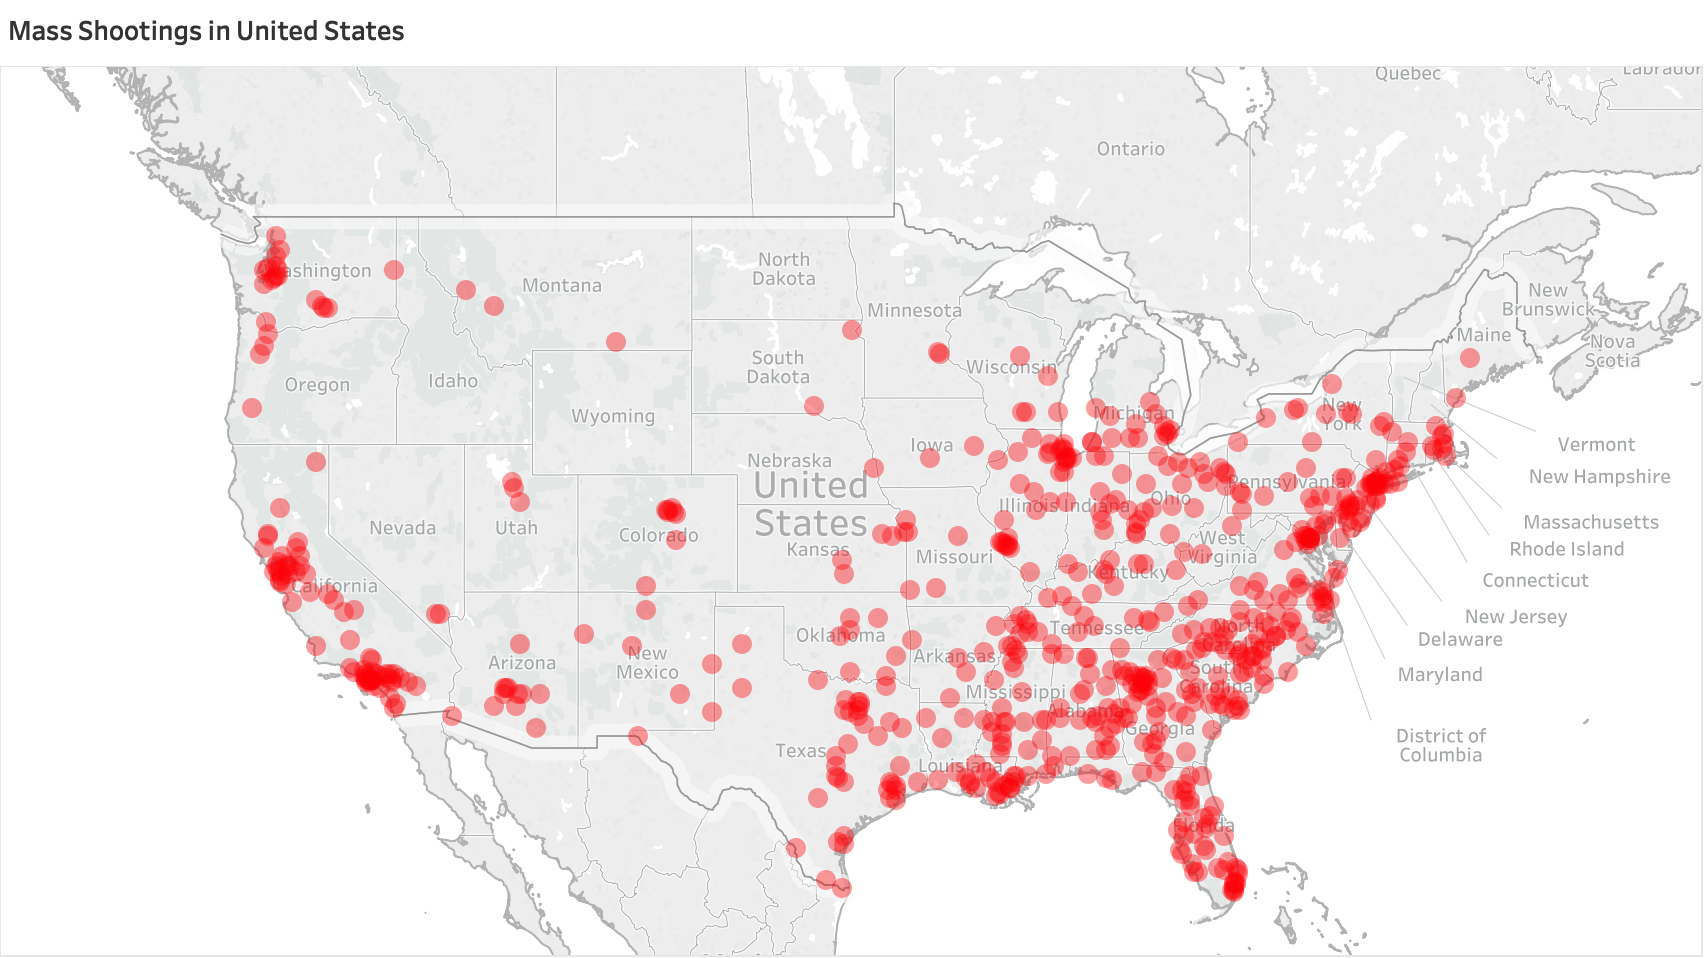

In [25]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/statewise_massShoot.png', width = 1300, height = 700)

**Graph 2**: Visualization for gun death rate over the years compared for atleast 1 law across US states

In [73]:
Image

IPython.core.display.Image

**Graph 3**: This graph indicates the sum of death rate per 100k people and compares that for US states with and without assault weapons ban laws. Key variables of interest are - Firearms Death Rate per 100,000 & Assault Weapons Ban.

We can clearly see that the sum of gun death rate per 100k people is significantly higher for states with no gun laws related to assault weapons.  

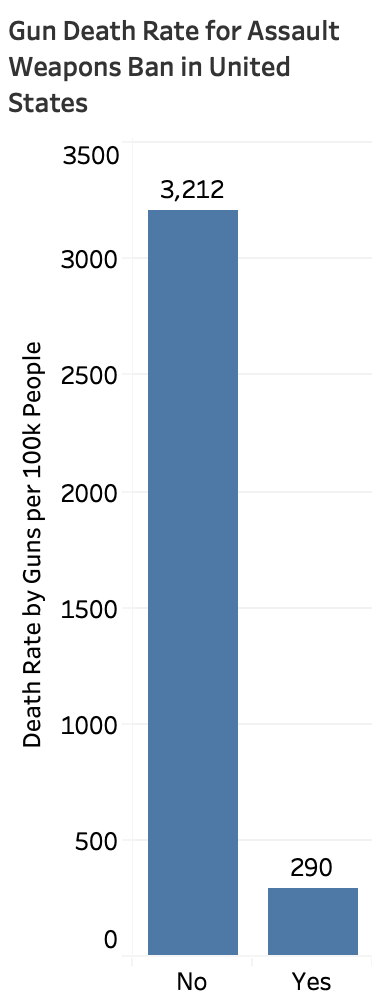

In [27]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/AssaultBanDeathrate.png', width = 200, height = 100)

**Graph 4**: This graph indicates the sum of death rate per 100k people and compares that for US states with and without child access prevention gun laws. Key variables of interest are - Firearms Death Rate per 100,000 & Child Access Prevention Firearm Law.

We can see that there is no significant difference in the sum of gun death rate per 100k people across states with/ without gun laws related to child access prevention firearm laws.  

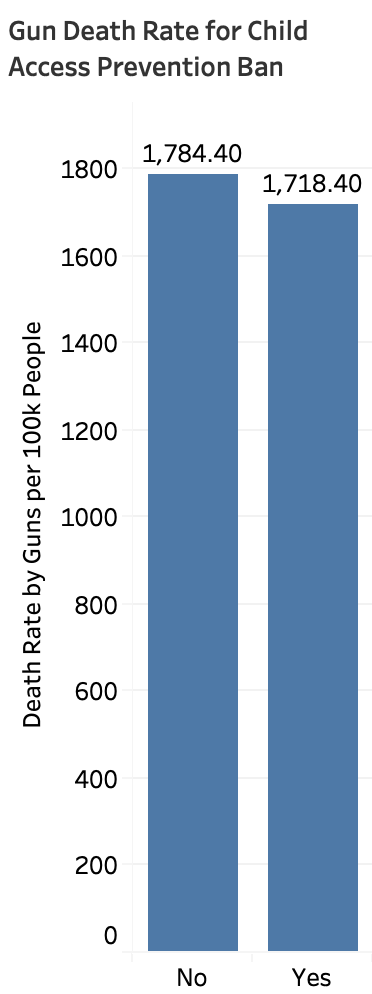

In [28]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/ChildPreventionDeathRate.png', width = 200, height = 100)

**Graph 5**: This graph indicates the sum of death rate per 100k people and compares that for US states with and without safe storage or gun locks laws. Key variables of interest are - Firearms Death Rate per 100,000 & Safe Storage or Gun Lock Requirement.

We can clearly see that the sum of gun death rate per 100k people is significantly higher for states with no gun laws related to Safe Storage or Gun Lock Requirement.  

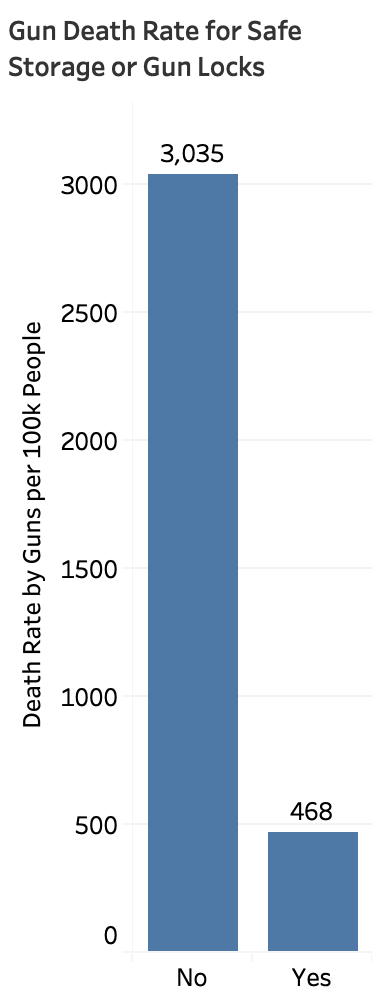

In [29]:
Image('https://raw.githubusercontent.com/pragyansharma24/Gun-Violence-in-United-States/master/Images/SafeStorageDeathRate.png', width = 200, height = 100)

### The argument that we are trying to present here is that 

In [79]:
# Dashboard
Image

IPython.core.display.Image

---